In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
data = pd.read_csv('cleaned_googleplaystore.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [5]:
rt = data[data.Rating >= 3.8]
rt = rt[rt.Rating <= 4.8]
rt.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [6]:
rt.Rating.max()

4.8

In [7]:
rt.Rating.min()

3.8

In [8]:
len(rt)

7696

In [9]:
rt = rt.drop(['Reviews','Size','Installs','Type','Price','Content Rating','Last Updated','Current Ver','Android Ver'], axis=1)
rt.head()

,App,Category,Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,Art & Design;Creativity


In [10]:
rt = rt.drop_duplicates()
len(rt)

6664

In [11]:
rt.App.is_unique

False

In [15]:
#default max rows is 10
#set to none to display all
pd.set_option('display.max_rows', None)

dups = rt[rt.App.duplicated(keep=False)]
dups.sort_values('App')

,App,Category,Rating,Genres
1675,8 Ball Pool,GAME,4.5,Sports
3953,8 Ball Pool,SPORTS,4.5,Sports
920,A&E - Watch Full Episodes of TV Shows,ENTERTAINMENT,4.0,Entertainment
4991,A&E - Watch Full Episodes of TV Shows,FAMILY,4.0,Entertainment
1843,Angry Birds 2,GAME,4.6,Casual
4864,Angry Birds 2,FAMILY,4.6,Casual
8297,Babbel – Learn Languages,FAMILY,4.3,Education
717,Babbel – Learn Languages,EDUCATION,4.3,Education
1687,Barbie™ Fashion Closet,GAME,4.1,Casual;Creativity
2045,Barbie™ Fashion Closet,FAMILY,4.1,Casual;Creativity


In [19]:
pd.set_option('display.max_rows', 10)

#ok, so these duplicates either switched their category somewhere along the way
#or they have a different rating
#logical thought process seems to be - keep the later entry as it would be the more recent

drop_me = rt[rt.App.duplicated(keep='last')]
drop_me

,App,Category,Rating,Genres
1,Coloring book moana,ART_AND_DESIGN,3.9,Art & Design;Pretend Play
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,Art & Design;Creativity
206,Call Blocker,BUSINESS,4.6,Business
699,Duolingo: Learn Languages Free,EDUCATION,4.7,Education;Education
700,TED,EDUCATION,4.6,Education
...,...,...,...,...
2837,My Photo Keyboard,PHOTOGRAPHY,4.3,Photography
2873,Photo Editor,PHOTOGRAPHY,4.3,Photography
3292,Flashlight,TOOLS,4.7,Tools
3702,Cartoon Network App,VIDEO_PLAYERS,4.0,Video Players & Editors;Music & Video


In [20]:
#checking if i can actually pass in this list into .drop()
drop_me.index

Int64Index([   1,   36,  206,  699,  700,  705,  707,  714,  717,  719,  726,
             747,  751,  755,  758,  808,  820,  825,  852,  853,  855,  859,
             865,  870,  881,  889,  891,  893,  894,  905,  917,  920,  921,
             923,  924,  941,  942,  945,  953,  955, 1003, 1486, 1653, 1655,
            1656, 1657, 1658, 1660, 1662, 1666, 1670, 1675, 1678, 1681, 1687,
            1694, 1695, 1697, 1698, 1722, 1739, 1746, 1753, 1786, 1790, 1801,
            1826, 1843, 1845, 1848, 1852, 1853, 1863, 1868, 1943, 1958, 1980,
            2013, 2041, 2156, 2238, 2269, 2508, 2837, 2873, 3292, 3702, 3712],
           dtype='int64')

In [22]:
rt = rt.drop(drop_me.index)
rt.App.is_unique

True

In [23]:
len(rt)

6576

In [24]:
rt = rt.reset_index(drop=True)
rt.head()

,App,Category,Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,Art & Design
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,Art & Design
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,Art & Design
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,Art & Design;Creativity
4,Paper flowers instructions,ART_AND_DESIGN,4.4,Art & Design


In [26]:
rt.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [27]:
rt.Genres.unique()

array(['Art & Design', 'Art & Design;Creativity', 'Auto & Vehicles',
       'Beauty', 'Books & Reference', 'Business', 'Comics',
       'Comics;Creativity', 'Communication', 'Dating', 'Education',
       'Education;Creativity', 'Education;Education',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Creativity',
       'Entertainment;Music & Video', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play', 'Arcade', 'Action',
       'Puzzle', 'Casual', 'Music', 'Racing', 'Sports', 'Word',
       'Adventure', 'Board', 'Trivia', 'Role Playing', 'Strategy',
       'Simulation', 'Simulation;Education', 'Card',
       'Action;Action & Adventure', 'Casual;Brain Games',
       'Adventure;Action & Adventure', 'Educational;Creativity',
       'Puzzle;Brain Games', 'Educational;Education', 'Card;Brain Games',
       'Casual;Pretend Pl

In [434]:
#rt.to_csv('rating_df.csv', sep=',', index=False)

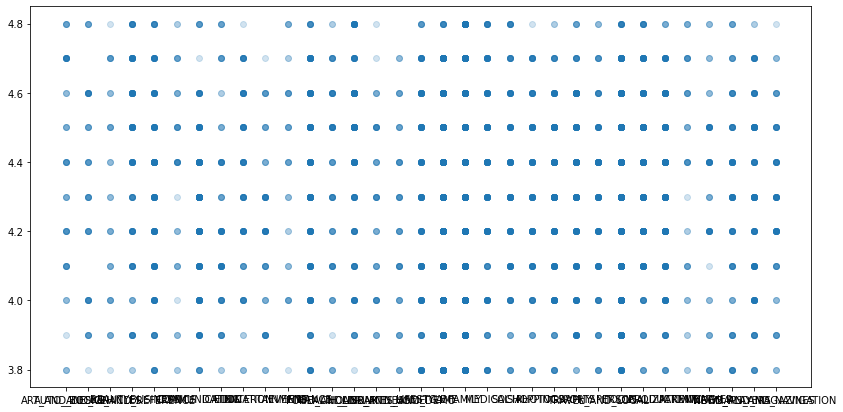

In [28]:
plt.figure(figsize=(14,7))
plt.scatter(rt.Category, rt.Rating, alpha=.2)

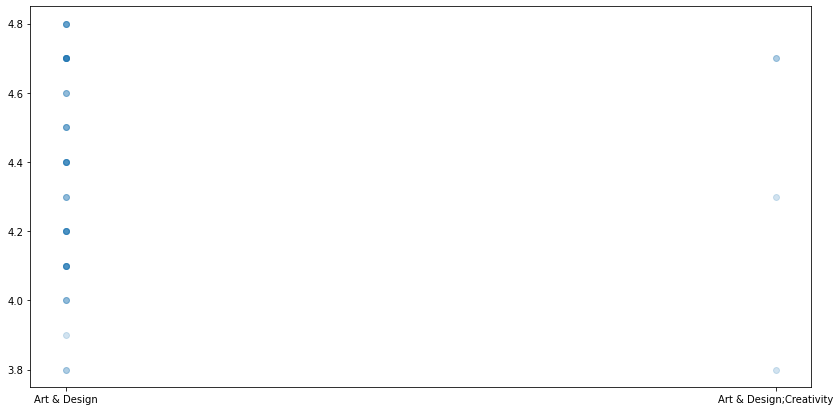

In [35]:
#LOL, that doesn't help at all
#so... divide the data into its categories and then plot by genre and rating??

rt_art = rt[rt.Category == 'ART_AND_DESIGN']
plt.figure(figsize=(14,7))
plt.scatter(rt_art.Genres, rt_art.Rating, alpha=.2)

<AxesSubplot:xlabel='Rating', ylabel='Genres'>

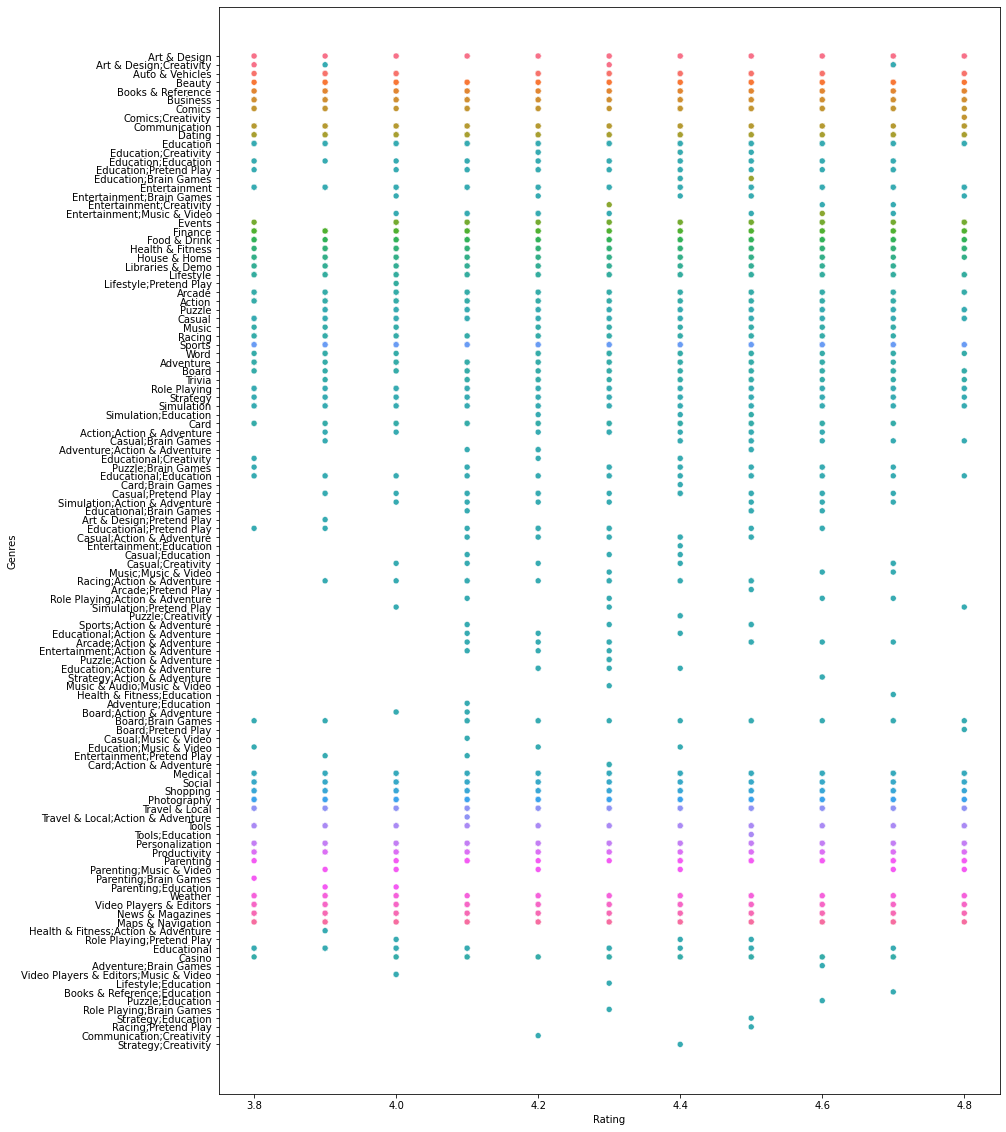

In [433]:
#OR, what if
plt.figure(figsize=(14,20))
sns.scatterplot(x=rt.Rating, y=rt.Genres, alpha=1, hue=rt.Category, legend=False)

In [51]:
#this might be doable with the zoom sliders...
#so family category is dominating the graph
rt_fam = rt[rt.Category == "FAMILY"]
rt_fam.head()

,App,Category,Rating,Genres
1274,YouTube Kids,FAMILY,4.5,Entertainment;Music & Video
1275,Candy Bomb,FAMILY,4.4,Casual;Brain Games
1276,ROBLOX,FAMILY,4.5,Adventure;Action & Adventure
1277,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,Casual;Brain Games
1278,Coloring & Learn,FAMILY,4.4,Educational;Creativity


In [52]:
rt_notfam = rt[rt.Category != "FAMILY"]
rt_notfam.head()

,App,Category,Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,Art & Design
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,Art & Design
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,Art & Design
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,Art & Design;Creativity
4,Paper flowers instructions,ART_AND_DESIGN,4.4,Art & Design


<AxesSubplot:xlabel='Rating', ylabel='Genres'>

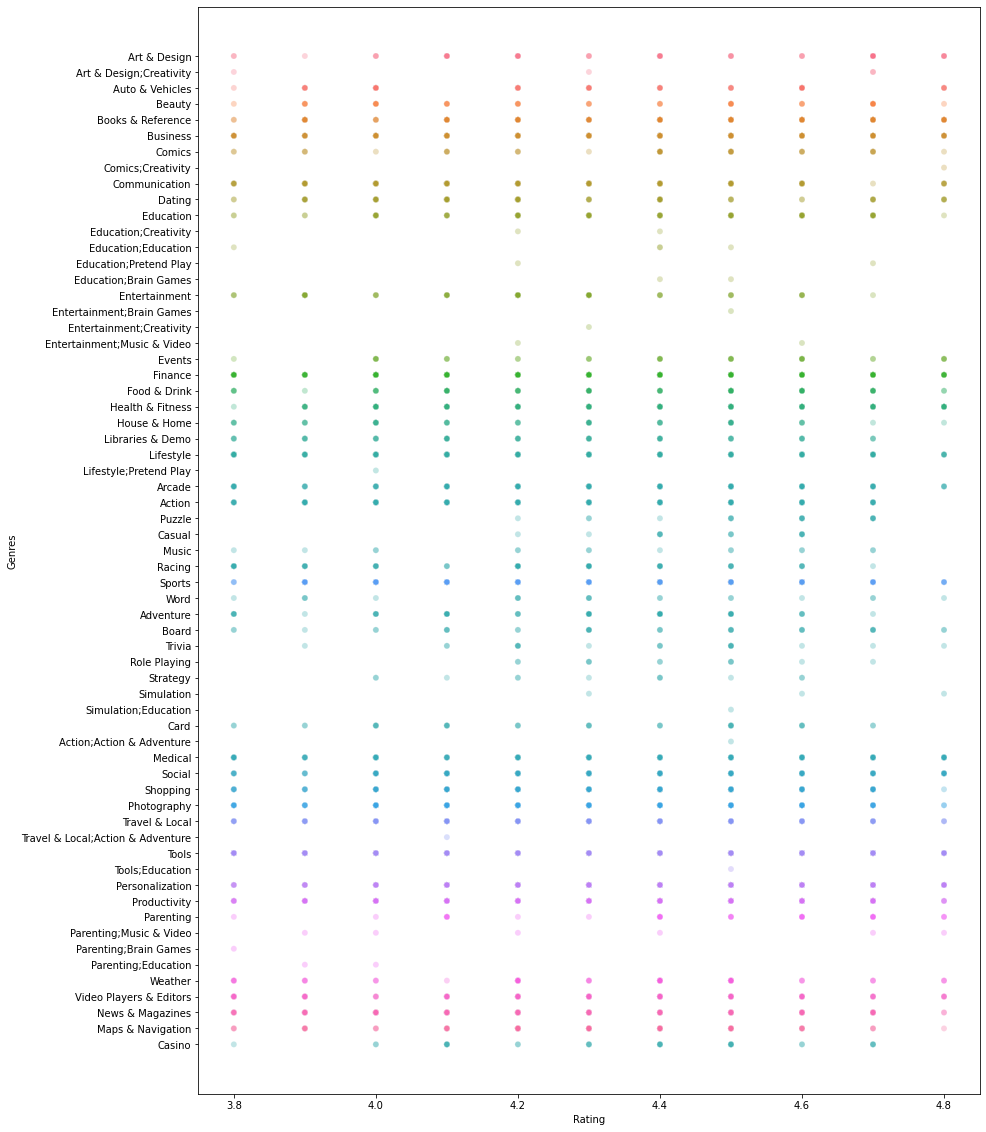

In [53]:
plt.figure(figsize=(14,20))
sns.scatterplot(x=rt_notfam.Rating, y=rt_notfam.Genres, alpha=.3, hue=rt_notfam.Category, legend=False)

<AxesSubplot:xlabel='Rating', ylabel='Genres'>

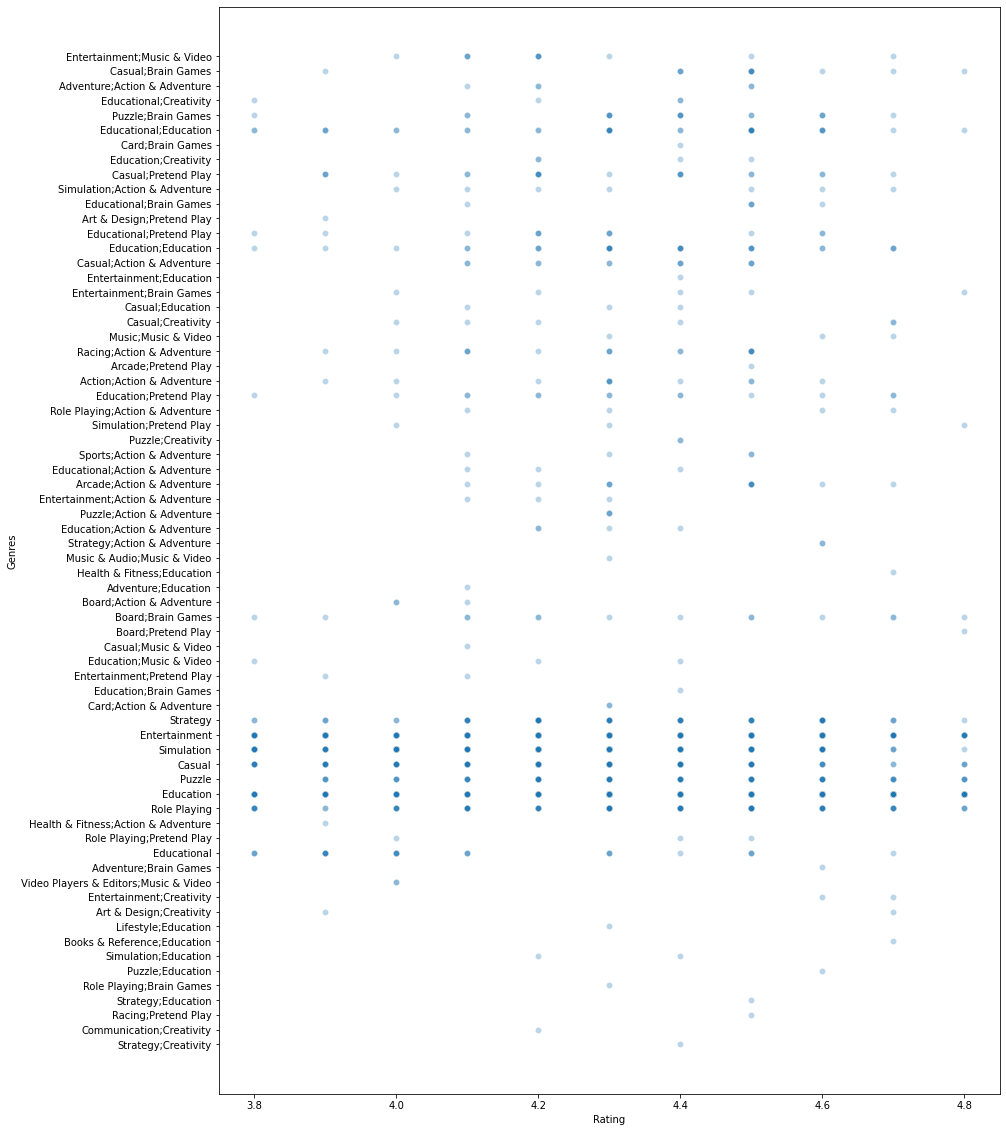

In [54]:
plt.figure(figsize=(14,20))
sns.scatterplot(x=rt_fam.Rating, y=rt_fam.Genres, alpha=.3)

In [56]:
#kk, back to dividing by category and then displaying genres within that category, I think thatll be most helpful for comparison
rt.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [57]:
rt_art = rt[rt.Category == 'ART_AND_DESIGN']
rt_auto = rt[rt.Category == 'AUTO_AND_VEHICLES']
rt_beaut = rt[rt.Category == 'BEAUTY']
rt_book = rt[rt.Category == 'BOOKS_AND_REFERENCE']
rt_biz = rt[rt.Category == 'BUSINESS']
rt_comic = rt[rt.Category == 'COMICS']
rt_comm = rt[rt.Category == 'COMMUNICATION']
rt_date = rt[rt.Category == 'DATING']
rt_edu = rt[rt.Category == 'EDUCATION']
rt_ent = rt[rt.Category == 'ENTERTAINMENT']
rt_ev = rt[rt.Category == 'EVENTS']
rt_fin = rt[rt.Category == 'FINANCE']
rt_foo = rt[rt.Category == 'FOOD_AND_DRINK']
rt_fit = rt[rt.Category == 'HEALTH_AND_FITNESS']
rt_houz = rt[rt.Category == 'HOUSE_AND_HOME']
rt_lib = rt[rt.Category == 'LIBRARIES_AND_DEMO']
rt_life = rt[rt.Category == 'LIFESTYLE']
rt_game = rt[rt.Category == 'GAME']
rt_fam = rt[rt.Category == 'FAMILY']
rt_med = rt[rt.Category == 'MEDICAL']
rt_soc = rt[rt.Category == 'SOCIAL']
rt_shop = rt[rt.Category == 'SHOPPING']
rt_phot = rt[rt.Category == 'PHOTOGRAPHY']
rt_sport = rt[rt.Category == 'SPORTS']
rt_trav = rt[rt.Category == 'TRAVEL_AND_LOCAL']
rt_tool = rt[rt.Category == 'TOOLS']
rt_pers = rt[rt.Category == 'PERSONALIZATION']
rt_prod = rt[rt.Category == 'PRODUCTIVITY']
rt_par = rt[rt.Category == 'PARENTING']
rt_wea = rt[rt.Category == 'WEATHER']
rt_vid = rt[rt.Category == 'VIDEO_PLAYERS']
rt_news = rt[rt.Category == 'NEWS_AND_MAGAZINES']
rt_maps = rt[rt.Category == 'MAPS_AND_NAVIGATION']

<AxesSubplot:xlabel='Rating', ylabel='Genres'>

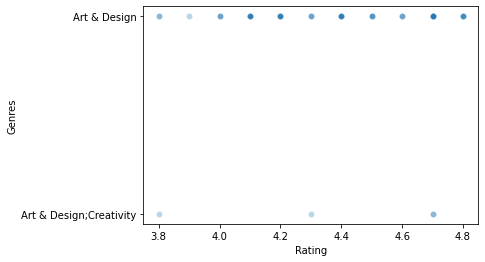

In [59]:
sns.scatterplot(x=rt_art.Rating, y=rt_art.Genres, alpha=.3)

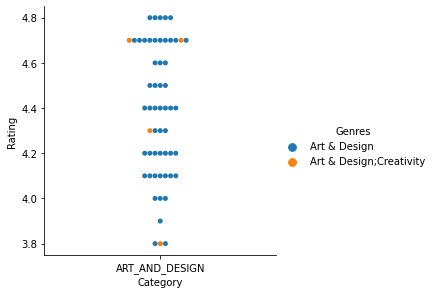

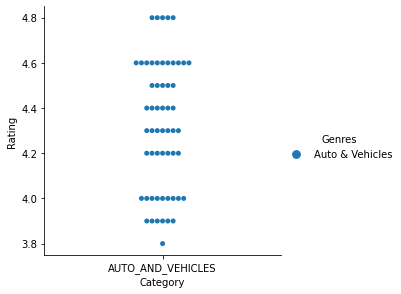

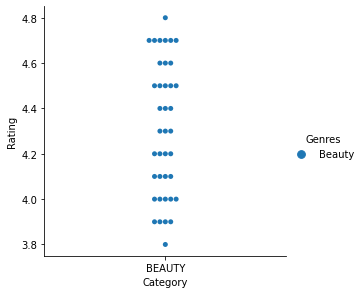

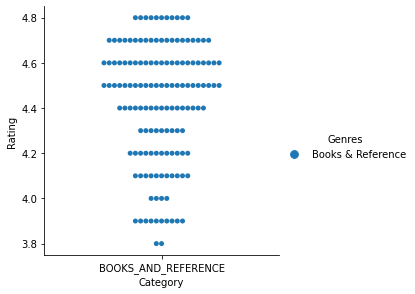

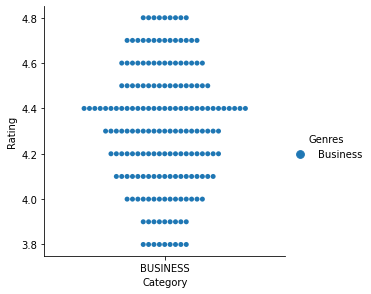

In [128]:
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_art, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_auto, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_beaut, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_book, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_biz, height=4, kind='swarm')

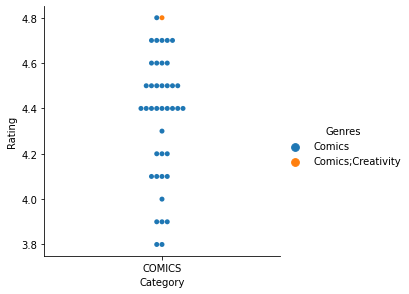

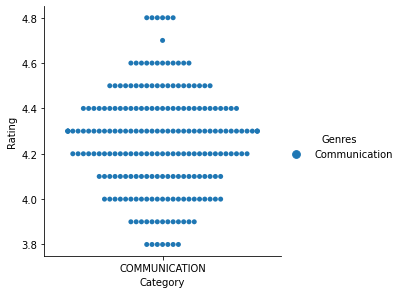

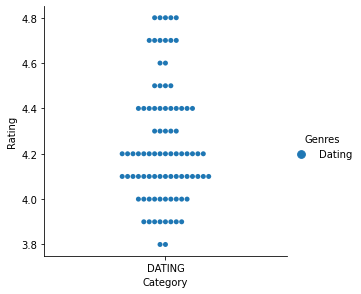

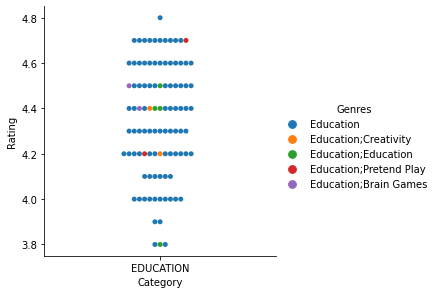

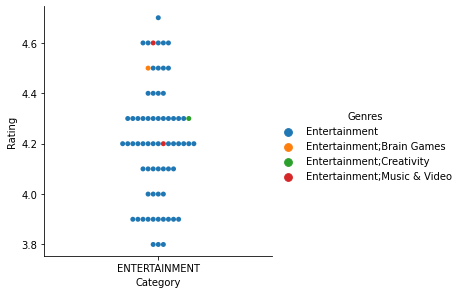

In [129]:
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_comic, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_comm, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_date, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_edu, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_ent, height=4, kind='swarm')

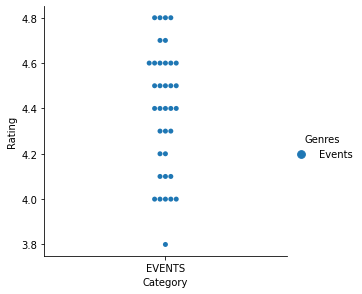

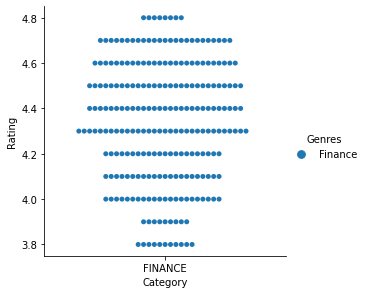

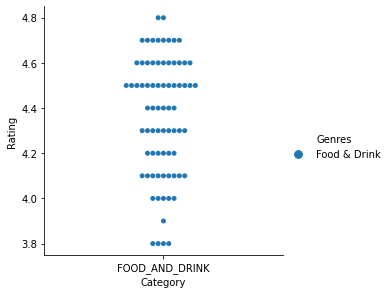

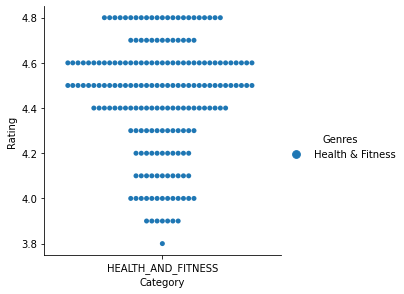

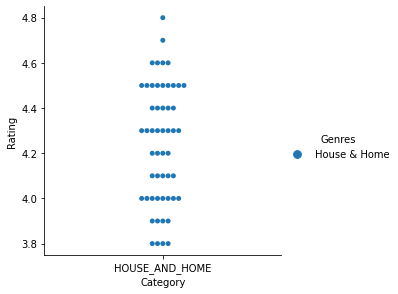

In [130]:
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_ev, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_fin, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_foo, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_fit, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_houz, height=4, kind='swarm')

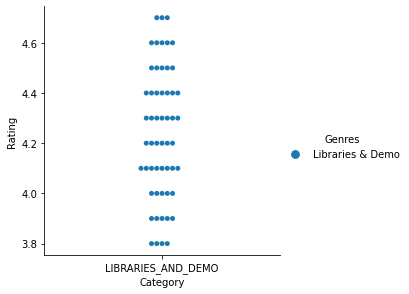

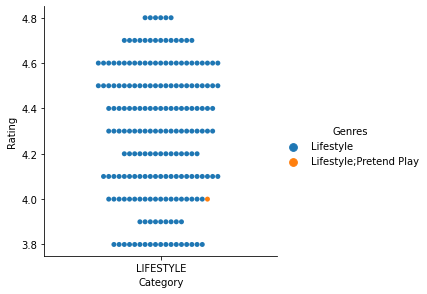

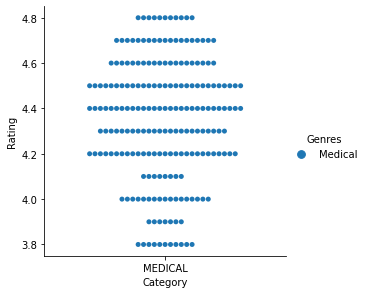

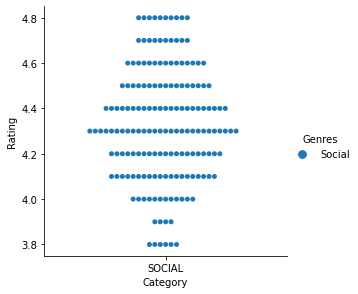

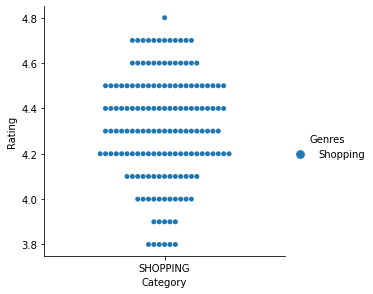

In [132]:
#skipping game and fam
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_lib, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_life, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_med, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_soc, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_shop, height=4, kind='swarm')

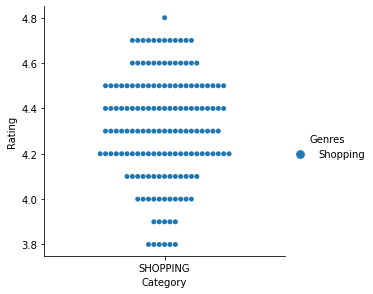

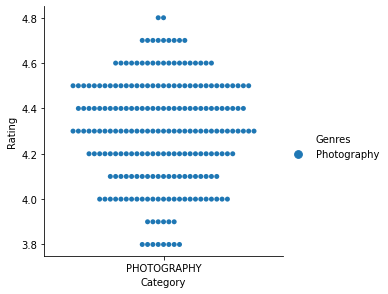

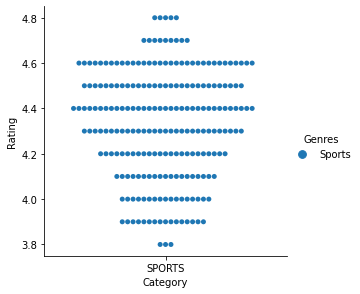

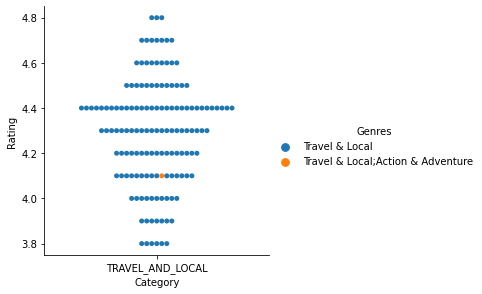

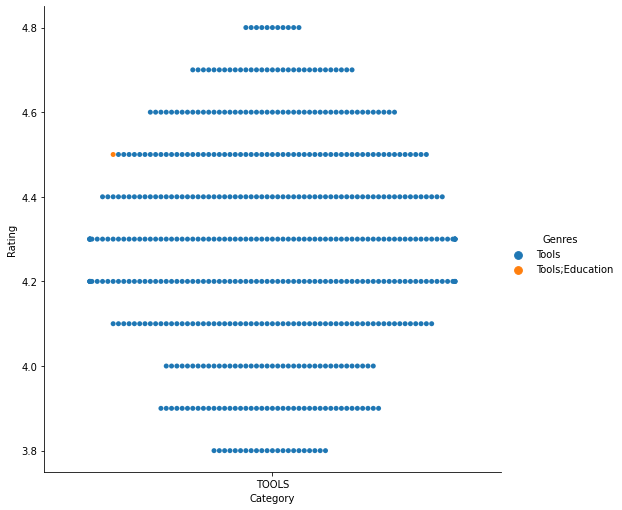

In [137]:
#tools too large
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_shop, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_phot, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_sport, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_trav, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_tool, height=7, kind='swarm')

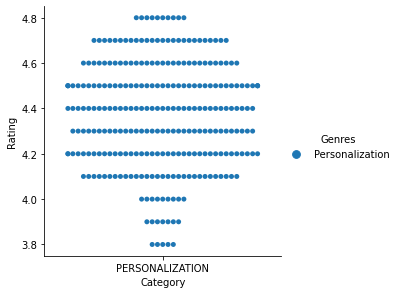

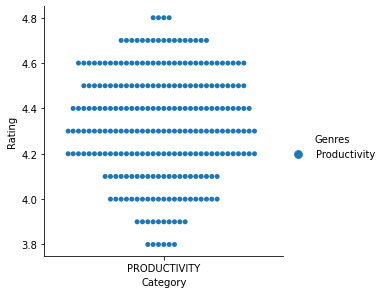

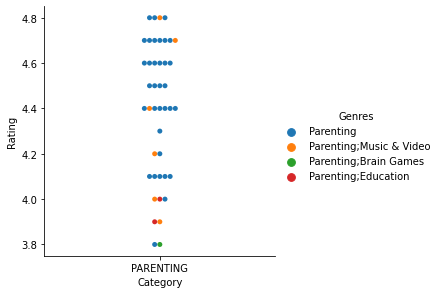

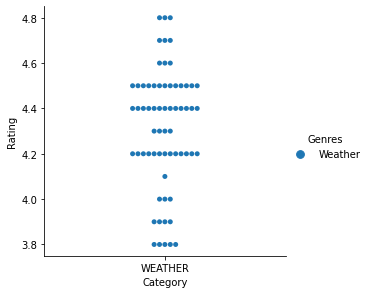

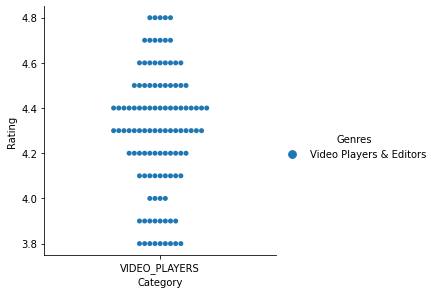

In [139]:
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_pers, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_prod, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_par, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_wea, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_vid, height=4, kind='swarm')

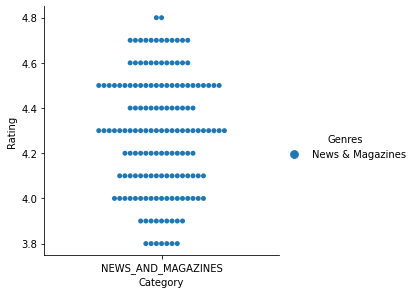

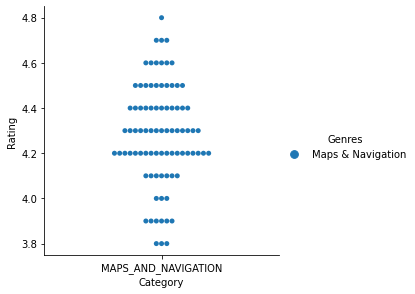

In [140]:
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_news, height=4, kind='swarm')
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_maps, height=4, kind='swarm')

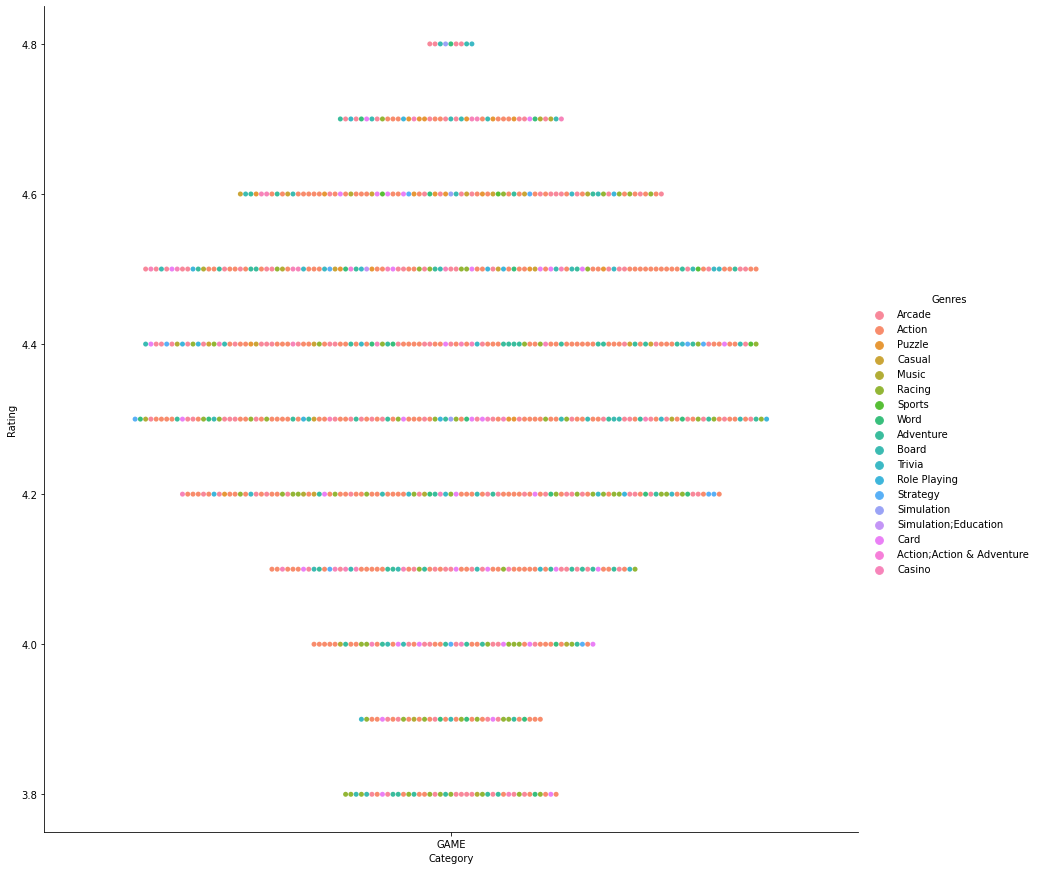

In [337]:
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_game, height=12, kind='swarm')

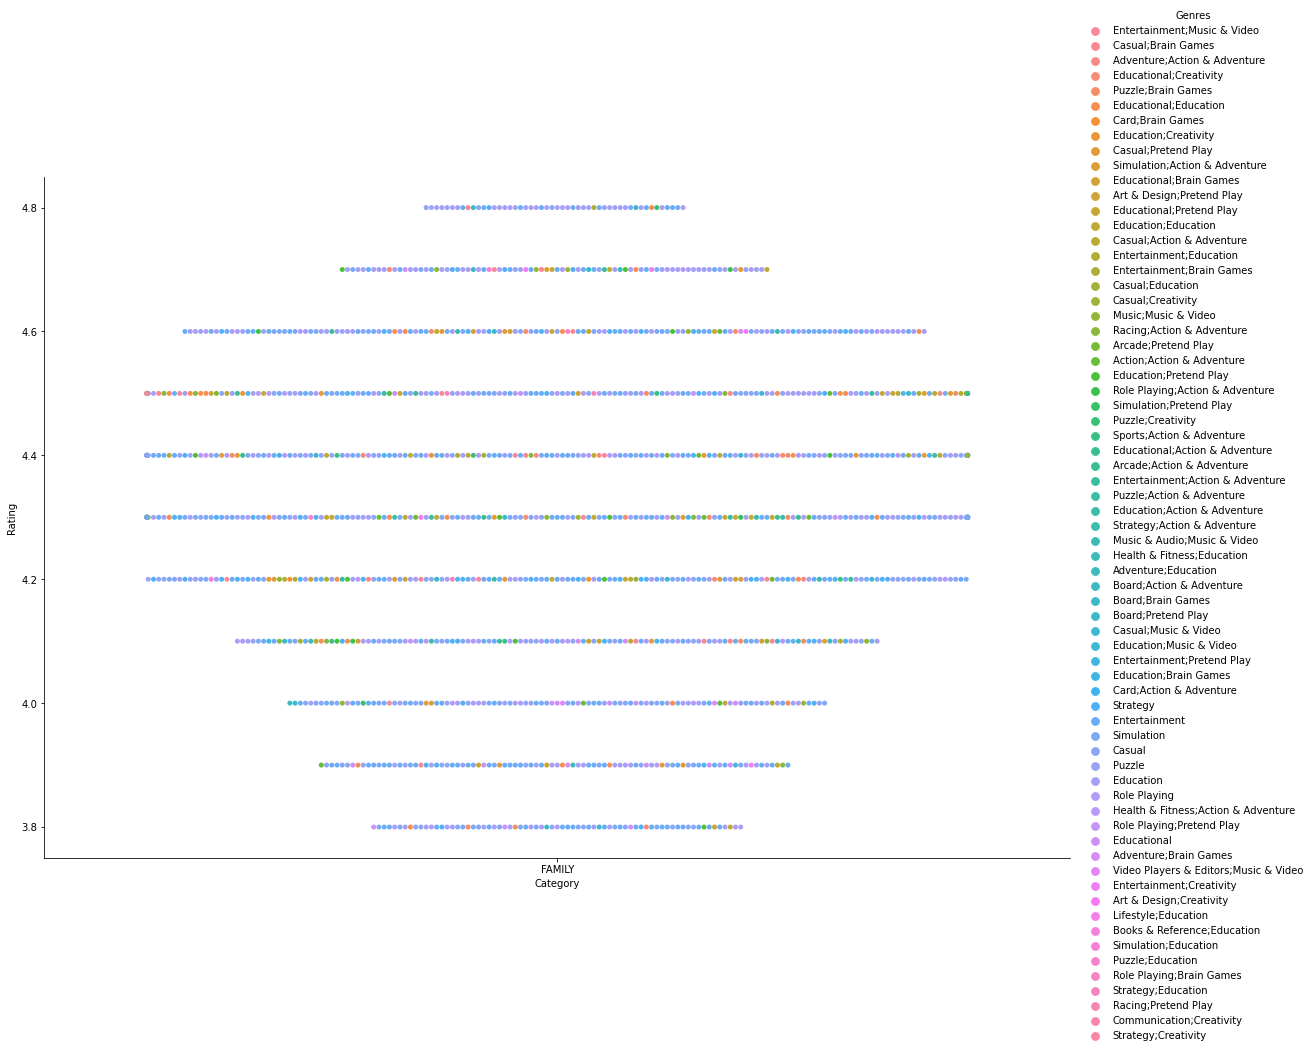

In [242]:
sns.catplot(x='Category', y='Rating', hue='Genres', data=rt_fam, height=10, aspect=1.5, kind='swarm')

In [146]:
rt_not = rt_notfam[rt_notfam.Category != 'GAME']
rt_not.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'MEDICAL', 'SOCIAL', 'SHOPPING',
       'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS',
       'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

C:\Users\james\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 64.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\james\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.6% of the points

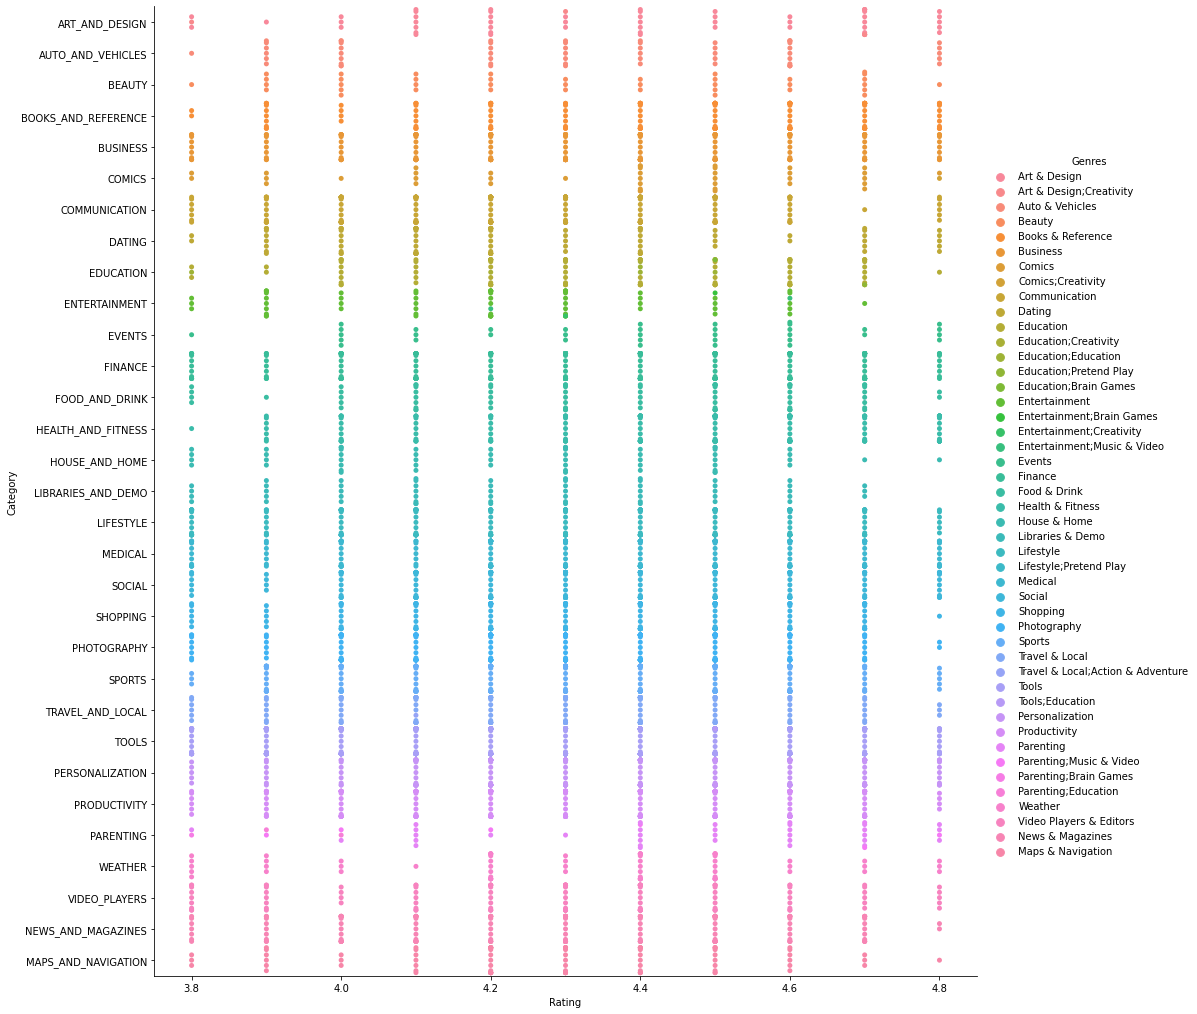

In [150]:
sns.catplot(x='Rating', y='Category', hue='Genres', data=rt_not, height=14, kind='swarm')

In [153]:
#ok what have we learned so far
#family and game categories need to be viewed on their own
#for most, within categories, there exists almost no variation in genres
#so for all categories that aren't family or game, genres doesn't need to be displayed

In [173]:
#can we try combining categories into smaller groups?
rt_1 = pd.concat([rt_art, rt_auto, rt_beaut, rt_book, rt_biz])
rt_1.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS'], dtype=object)

In [163]:
rt_1.head()

,App,Category,Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,Art & Design
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,Art & Design
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,Art & Design
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,Art & Design;Creativity
4,Paper flowers instructions,ART_AND_DESIGN,4.4,Art & Design


In [164]:
rt_1.tail()

,App,Category,Rating,Genres
6515,English To Shona Dictionary,BOOKS_AND_REFERENCE,4.6,Books & Reference
6564,Golden Dictionary (FR-AR),BOOKS_AND_REFERENCE,4.2,Books & Reference
6568,Bulgarian French Dictionary Fr,BOOKS_AND_REFERENCE,4.6,Books & Reference
6571,Chemin (fr),BOOKS_AND_REFERENCE,4.8,Books & Reference
6574,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,Books & Reference


In [176]:
len(rt_1)

476

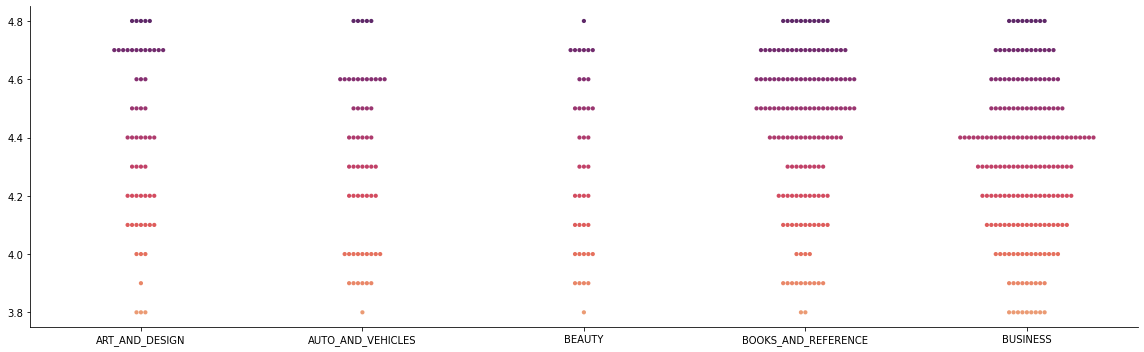

In [446]:
ax = sns.catplot(x='Category', y='Rating', hue='Rating', palette='flare', data=rt_1, kind='swarm', aspect=3.2, s=4.2, legend=False)
ax.set(xlabel=None, ylabel=None)

In [224]:
#ok....... this might work?
rt_2 = pd.concat([rt_comic, rt_comm, rt_date, rt_edu, rt_ent])
rt_3 = pd.concat([rt_ev, rt_fin, rt_foo, rt_fit, rt_houz])
rt_4 = pd.concat([rt_lib, rt_life, rt_maps, rt_med, rt_news])
rt_5 = pd.concat([rt_par, rt_pers, rt_phot, rt_prod, rt_shop])
rt_6 = pd.concat([rt_soc, rt_sport, rt_trav, rt_wea, rt_vid])

#not sure what to do with tools yet
#rt_tool = rt[rt.Category == 'TOOLS']

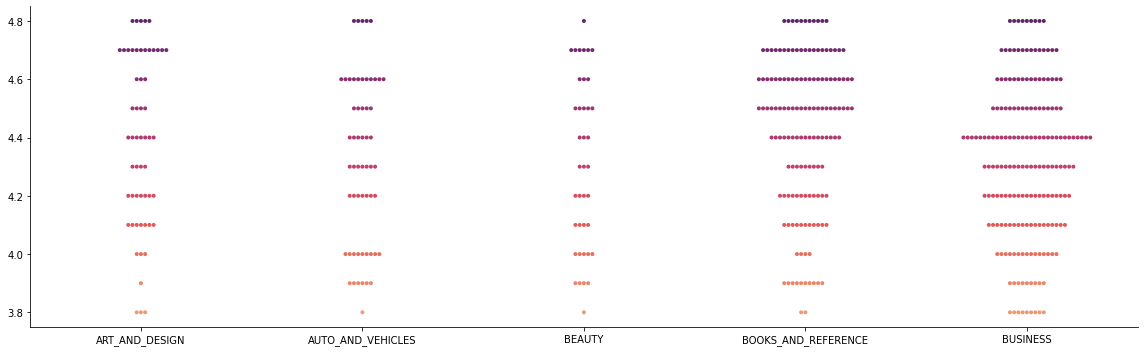

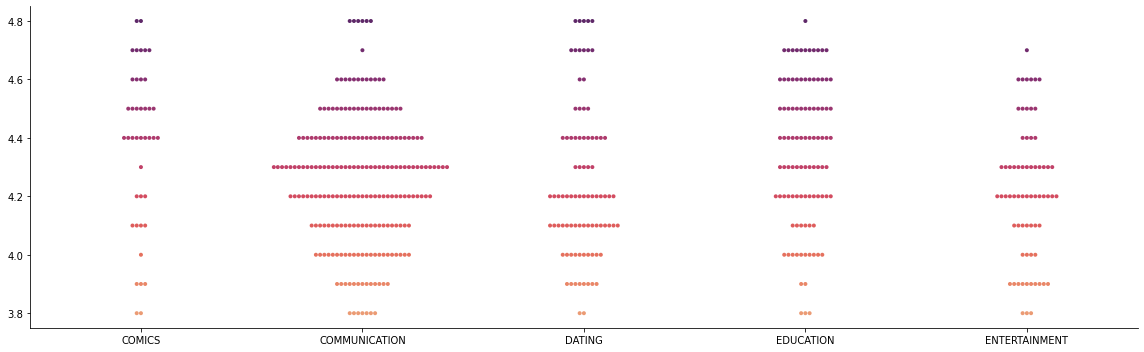

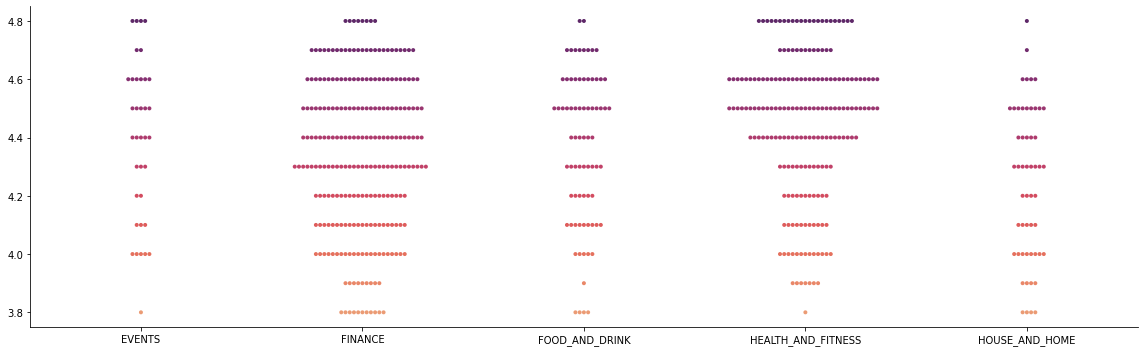

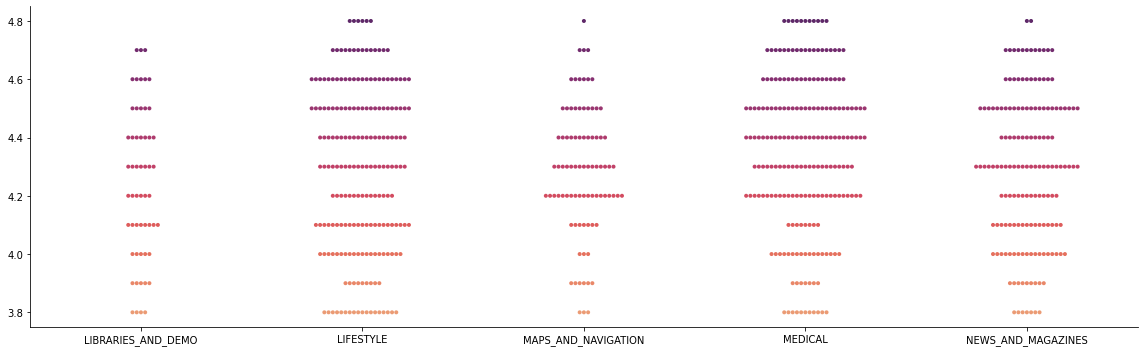

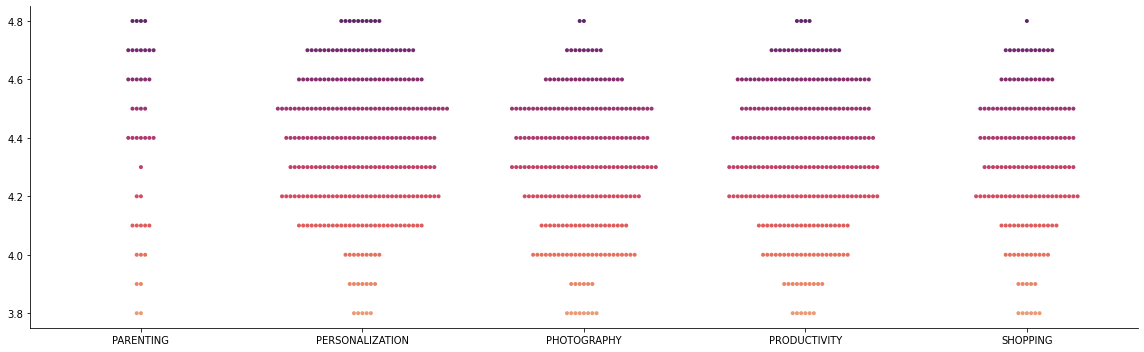

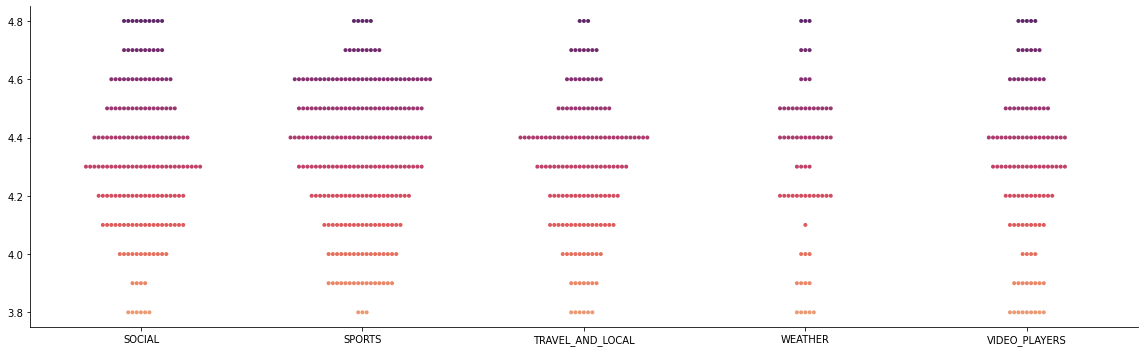

In [448]:
ax1 = sns.catplot(x='Category', y='Rating', hue='Rating', palette='flare', data=rt_1, kind='swarm', aspect=3.2, s=4, legend=False)
ax2 = sns.catplot(x='Category', y='Rating', hue='Rating', palette='flare', data=rt_2, kind='swarm', aspect=3.2, s=4, legend=False)
ax3 = sns.catplot(x='Category', y='Rating', hue='Rating', palette='flare', data=rt_3, kind='swarm', aspect=3.2, s=4, legend=False)
ax4 = sns.catplot(x='Category', y='Rating', hue='Rating', palette='flare', data=rt_4, kind='swarm', aspect=3.2, s=4, legend=False)
ax5 = sns.catplot(x='Category', y='Rating', hue='Rating', palette='flare', data=rt_5, kind='swarm', aspect=3.2, s=4, legend=False)
ax6 = sns.catplot(x='Category', y='Rating', hue='Rating', palette='flare', data=rt_6, kind='swarm', aspect=3.2, s=4, legend=False)

ax1.set(xlabel=None, ylabel=None)
ax2.set(xlabel=None, ylabel=None)
ax3.set(xlabel=None, ylabel=None)
ax4.set(xlabel=None, ylabel=None)
ax5.set(xlabel=None, ylabel=None)
ax6.set(xlabel=None, ylabel=None)

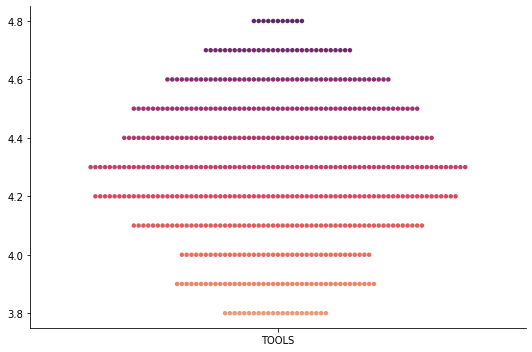

In [432]:
#need to visualize tools
#figure out how to present family and game

ax = sns.catplot(x='Category', y='Rating', hue='Rating', palette='flare', data=rt_tool, kind='swarm', aspect=1.5, s=4.5, legend=False)

ax.set(xlabel=None, ylabel=None)

In [264]:
#working on fam

j = rt_fam.Genres.unique()

for i in j:
    print(i + ': ' + str(len(rt_fam[rt_fam.Genres == i])))

Entertainment;Music & Video: 11
Casual;Brain Games: 12
Adventure;Action & Adventure: 5
Educational;Creativity: 4
Puzzle;Brain Games: 17
Educational;Education: 32
Card;Brain Games: 1
Education;Creativity: 4
Casual;Pretend Play: 21
Simulation;Action & Adventure: 7
Educational;Brain Games: 5
Art & Design;Pretend Play: 1
Educational;Pretend Play: 12
Education;Education: 28
Casual;Action & Adventure: 12
Entertainment;Education: 1
Entertainment;Brain Games: 5
Casual;Education: 3
Casual;Creativity: 6
Music;Music & Video: 3
Racing;Action & Adventure: 16
Arcade;Pretend Play: 1
Action;Action & Adventure: 11
Education;Pretend Play: 14
Role Playing;Action & Adventure: 4
Simulation;Pretend Play: 3
Puzzle;Creativity: 2
Sports;Action & Adventure: 4
Educational;Action & Adventure: 3
Arcade;Action & Adventure: 12
Entertainment;Action & Adventure: 3
Puzzle;Action & Adventure: 3
Education;Action & Adventure: 4
Strategy;Action & Adventure: 2
Music & Audio;Music & Video: 1
Health & Fitness;Education: 1
Adv

In [265]:
for i in j:
    if (len(rt_fam[rt_fam.Genres == i]) > 50):
        print(i)

Strategy
Entertainment
Simulation
Casual
Puzzle
Education
Role Playing


In [270]:
rt_fam1 = rt_fam[(rt_fam.Genres == 'Strategy') | (rt_fam.Genres == 'Entertainment') | (rt_fam.Genres == 'Simulation') |
                 (rt_fam.Genres == 'Casual') | (rt_fam.Genres == 'Puzzle') | (rt_fam.Genres == 'Education') |
                 (rt_fam.Genres == 'Role Playing')]
rt_fam1.Genres.unique()

array(['Strategy', 'Entertainment', 'Simulation', 'Casual', 'Puzzle',
       'Education', 'Role Playing'], dtype=object)

In [280]:
rt_fam2 = rt_fam
rt_fam2 = rt_fam2.drop(rt_fam1.index)
rt_fam2.Genres.unique()

array(['Entertainment;Music & Video', 'Casual;Brain Games',
       'Adventure;Action & Adventure', 'Educational;Creativity',
       'Puzzle;Brain Games', 'Educational;Education', 'Card;Brain Games',
       'Education;Creativity', 'Casual;Pretend Play',
       'Simulation;Action & Adventure', 'Educational;Brain Games',
       'Art & Design;Pretend Play', 'Educational;Pretend Play',
       'Education;Education', 'Casual;Action & Adventure',
       'Entertainment;Education', 'Entertainment;Brain Games',
       'Casual;Education', 'Casual;Creativity', 'Music;Music & Video',
       'Racing;Action & Adventure', 'Arcade;Pretend Play',
       'Action;Action & Adventure', 'Education;Pretend Play',
       'Role Playing;Action & Adventure', 'Simulation;Pretend Play',
       'Puzzle;Creativity', 'Sports;Action & Adventure',
       'Educational;Action & Adventure', 'Arcade;Action & Adventure',
       'Entertainment;Action & Adventure', 'Puzzle;Action & Adventure',
       'Education;Action & Adventu

In [281]:
#checking
rt_fam2[rt_fam2.Genres == 'Strategy']

,App,Category,Rating,Genres


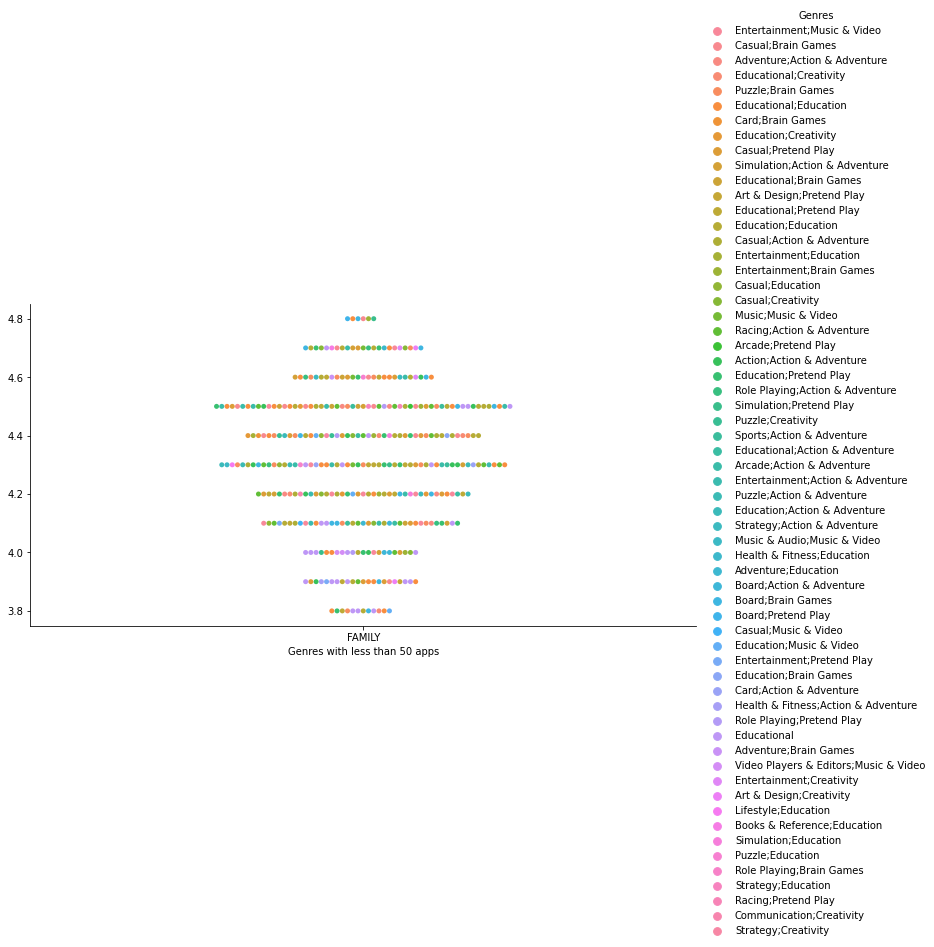

In [457]:
ax = sns.catplot(x='Category', y='Rating', hue='Genres', aspect=2, data=rt_fam2, kind='swarm')
ax.set(xlabel='Genres with less than 50 apps', ylabel=None)

In [293]:
len(rt_fam2.Genres.unique())

61

In [295]:
len(rt_fam2)

348

In [294]:
j = rt_fam2.Genres.unique()

for i in j:
    print(i + ': ' + str(len(rt_fam2[rt_fam2.Genres == i])))

Entertainment;Music & Video: 11
Casual;Brain Games: 12
Adventure;Action & Adventure: 5
Educational;Creativity: 4
Puzzle;Brain Games: 17
Educational;Education: 32
Card;Brain Games: 1
Education;Creativity: 4
Casual;Pretend Play: 21
Simulation;Action & Adventure: 7
Educational;Brain Games: 5
Art & Design;Pretend Play: 1
Educational;Pretend Play: 12
Education;Education: 28
Casual;Action & Adventure: 12
Entertainment;Education: 1
Entertainment;Brain Games: 5
Casual;Education: 3
Casual;Creativity: 6
Music;Music & Video: 3
Racing;Action & Adventure: 16
Arcade;Pretend Play: 1
Action;Action & Adventure: 11
Education;Pretend Play: 14
Role Playing;Action & Adventure: 4
Simulation;Pretend Play: 3
Puzzle;Creativity: 2
Sports;Action & Adventure: 4
Educational;Action & Adventure: 3
Arcade;Action & Adventure: 12
Entertainment;Action & Adventure: 3
Puzzle;Action & Adventure: 3
Education;Action & Adventure: 4
Strategy;Action & Adventure: 2
Music & Audio;Music & Video: 1
Health & Fitness;Education: 1
Adv

In [308]:
fam1 = rt_fam2.iloc[:116, :]
fam2 = rt_fam2.iloc[116:232, :]
fam3 = rt_fam2.iloc[232:, :]

In [309]:
print(len(fam1))
print(len(fam2))
print(len(fam3))

116
116
116


In [314]:
fam1.Genres.unique()

array(['Entertainment;Music & Video', 'Casual;Brain Games',
       'Adventure;Action & Adventure', 'Educational;Creativity',
       'Puzzle;Brain Games', 'Educational;Education', 'Card;Brain Games',
       'Education;Creativity', 'Casual;Pretend Play',
       'Simulation;Action & Adventure', 'Educational;Brain Games',
       'Art & Design;Pretend Play', 'Educational;Pretend Play',
       'Education;Education', 'Casual;Action & Adventure',
       'Entertainment;Education', 'Entertainment;Brain Games',
       'Casual;Education', 'Casual;Creativity', 'Music;Music & Video',
       'Racing;Action & Adventure', 'Arcade;Pretend Play',
       'Action;Action & Adventure', 'Education;Pretend Play',
       'Role Playing;Action & Adventure', 'Simulation;Pretend Play',
       'Puzzle;Creativity', 'Sports;Action & Adventure',
       'Educational;Action & Adventure', 'Arcade;Action & Adventure',
       'Entertainment;Action & Adventure', 'Puzzle;Action & Adventure',
       'Education;Action & Adventu

In [315]:
fam2.Genres.unique()

array(['Educational;Education', 'Health & Fitness;Education',
       'Adventure;Education', 'Education;Creativity',
       'Education;Pretend Play', 'Casual;Pretend Play',
       'Casual;Education', 'Casual;Action & Adventure',
       'Puzzle;Brain Games', 'Board;Action & Adventure',
       'Board;Brain Games', 'Casual;Brain Games', 'Board;Pretend Play',
       'Casual;Music & Video', 'Educational;Pretend Play',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Entertainment;Music & Video', 'Racing;Action & Adventure',
       'Entertainment;Pretend Play', 'Casual;Creativity',
       'Entertainment;Brain Games', 'Education;Education',
       'Simulation;Pretend Play', 'Arcade;Action & Adventure',
       'Education;Brain Games', 'Card;Action & Adventure',
       'Health & Fitness;Action & Adventure', 'Action;Action & Adventure',
       'Role Playing;Pretend Play', 'Educational',
       'Adventure;Brain Games', 'Role Playing;Action & Adventure',
       'Video Playe

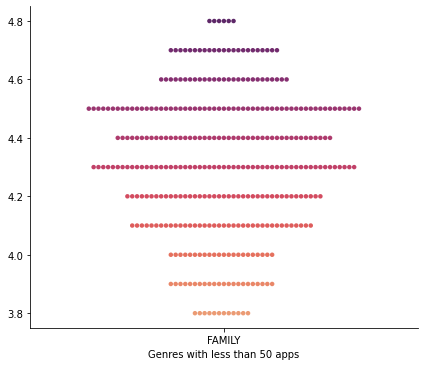

In [459]:
#ok wait, with how messy all of the genres are, especially for a lot of these one-offs - I have two options
#one - go through and deep clean the categories and genres
#  aka, combine / fix genres like education;education versus educational;education
#two - represent the multitude of genres as two graphs
#  the first being frequency of 61 different genres
#  and the second graph being with rating hue, to eliminate the rainbow of colors

#if i do the deep clean tho, that eleminates relevancy of how google play store is currently structured


ax = sns.catplot(x='Category', y='Rating', hue='Rating', palette='flare', data=rt_fam2, kind='swarm', aspect=1.2, s=4.5, legend=False)

ax.set(xlabel='Genres with less than 50 apps', ylabel=None)

In [318]:
#we need to split up the larger fam genres tho

rt_fam1.Genres.unique()

array(['Strategy', 'Entertainment', 'Simulation', 'Casual', 'Puzzle',
       'Education', 'Role Playing'], dtype=object)

In [319]:
fam_strat = rt_fam1[rt_fam1.Genres == 'Strategy']
fam_ent = rt_fam1[rt_fam1.Genres == 'Entertainment']
fam_sim = rt_fam1[rt_fam1.Genres == 'Simulation']
fam_cas = rt_fam1[rt_fam1.Genres == 'Casual']
fam_puz = rt_fam1[rt_fam1.Genres == 'Puzzle']
fam_edu = rt_fam1[rt_fam1.Genres == 'Education']
fam_rol = rt_fam1[rt_fam1.Genres == 'Role Playing']

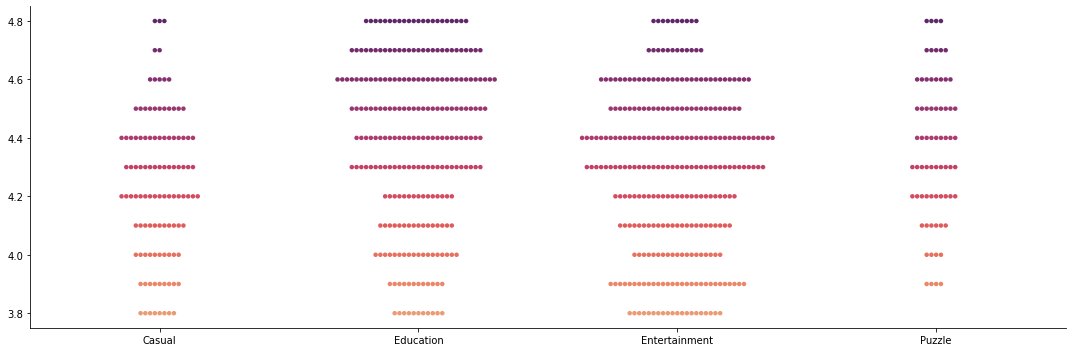

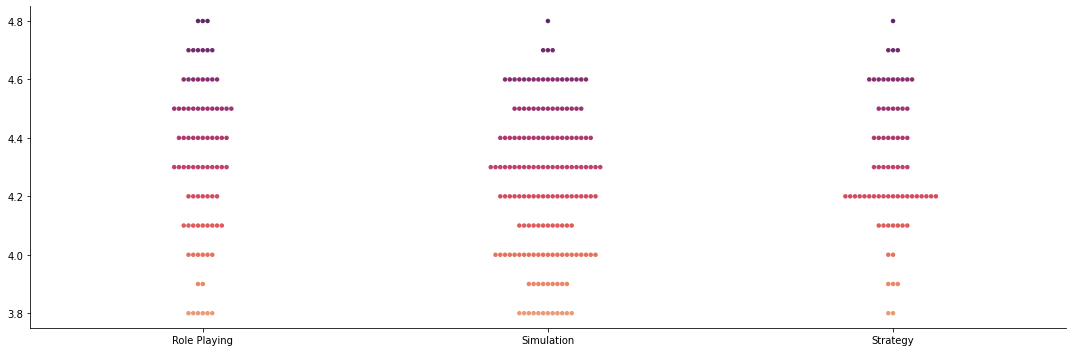

In [321]:
fam_1 = pd.concat([fam_cas, fam_edu, fam_ent, fam_puz])
fam_2 = pd.concat([fam_rol, fam_sim, fam_strat])


ax1 = sns.catplot(x='Genres', y='Rating', hue='Rating', palette='flare', data=fam_1, kind='swarm', aspect=3, s=4.5, legend=False)
ax2 = sns.catplot(x='Genres', y='Rating', hue='Rating', palette='flare', data=fam_2, kind='swarm', aspect=3, s=4.5, legend=False)
ax1.set(xlabel=None, ylabel=None)
ax2.set(xlabel=None, ylabel=None)

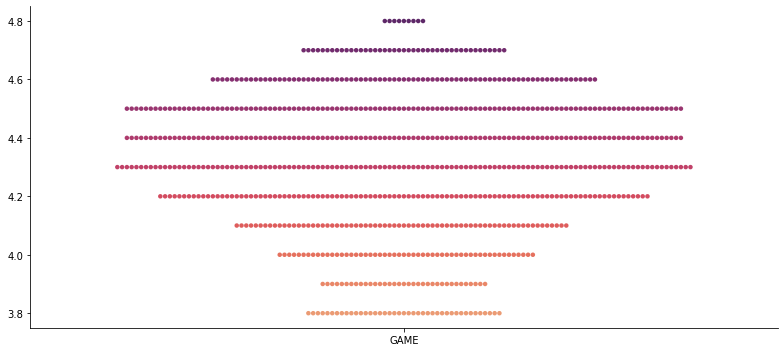

In [336]:
ax = sns.catplot(x='Category', y='Rating', hue='Rating', palette='flare', data=rt_game, kind='swarm', aspect=2.2, s=4.5, legend=False)
ax.set(xlabel=None, ylabel=None)

In [338]:
rt_game.Genres.unique()

array(['Arcade', 'Action', 'Puzzle', 'Casual', 'Music', 'Racing',
       'Sports', 'Word', 'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Strategy', 'Simulation', 'Simulation;Education', 'Card',
       'Action;Action & Adventure', 'Casino'], dtype=object)

In [340]:
rt_game[rt_game.Genres == 'Simulation']

,App,Category,Rating,Genres
1183,TerraGenesis - Space Colony,GAME,4.3,Simulation
1188,"Cash, Inc. Money Clicker Game & Business Adven...",GAME,4.8,Simulation
1202,RollerCoaster Tycoon® Classic,GAME,4.6,Simulation


In [341]:
len(rt_game)

791

In [346]:
rt_game = rt_game.sort_values('Genres')

In [388]:
j = rt_game.Genres.unique()

for i in j:
    print(i + ': ' + str(len(rt_game[rt_game.Genres == i])))

Action: 271
Action;Action & Adventure: 1
Adventure: 63
Arcade: 149
Board: 36
Card: 36
Casino: 34
Casual: 16
Music: 15
Puzzle: 20
Racing: 76
Role Playing: 12
Simulation: 3
Simulation;Education: 1
Sports: 4
Strategy: 12
Trivia: 21
Word: 21


In [392]:
#trying to split right before music
rt_game.iloc[600:610]

,App,Category,Rating,Genres
1222,Shoot Bubble - Fruit Splash,GAME,4.6,Casual
1182,Ice Crush 2018 - A new Puzzle Matching Adventure,GAME,4.6,Casual
1259,Bubble Shooter Genies,GAME,4.5,Casual
1260,Blossom Blast Saga,GAME,4.5,Casual
1265,Bubble Shooter Space,GAME,4.2,Casual
1264,Fruit Block - Puzzle Legend,GAME,4.6,Casual
2879,Magic Tiles - TWICE Edition (K-Pop),GAME,4.4,Music
5119,Just Dance Now,GAME,4.2,Music
2886,Magic Tiles - Blackpink Edition (K-Pop),GAME,4.6,Music
2665,Perfect Piano,GAME,4.2,Music


In [393]:
rt_game.iloc[606]

App         Magic Tiles - TWICE Edition (K-Pop)
Category                                   GAME
Rating                                      4.4
Genres                                    Music
Name: 2879, dtype: object

In [394]:
game1 = rt_game.iloc[:606,:]
game2 = rt_game.iloc[606:,:]

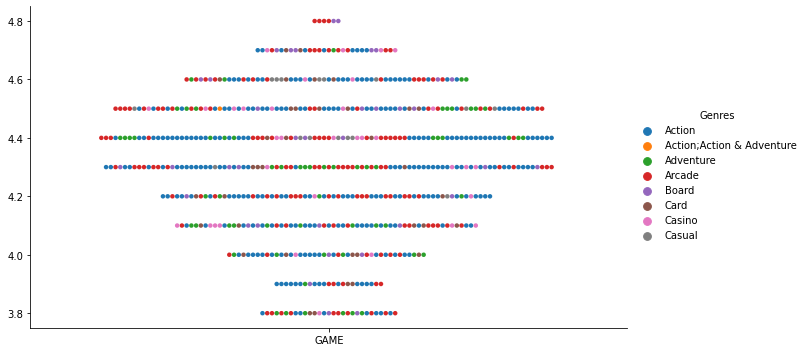

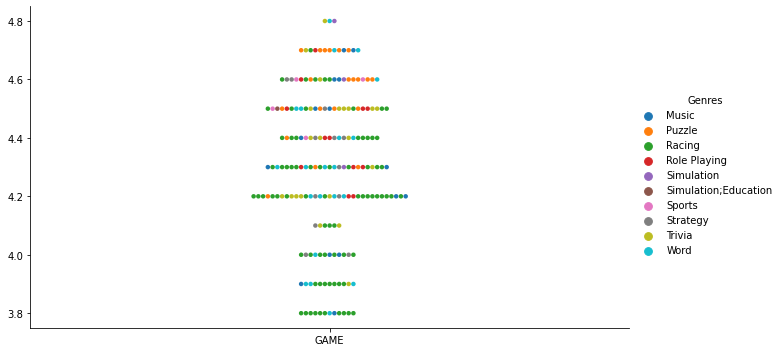

In [407]:
ax1 = sns.catplot(x='Category', y='Rating', hue='Genres', palette='tab10', data=game1, aspect=1.8, s=4.5, kind='swarm')
ax2 = sns.catplot(x='Category', y='Rating', hue='Genres', palette='tab10', data=game2, aspect=1.8, s=4.5, kind='swarm')
ax1.set(xlabel=None, ylabel=None)
ax2.set(xlabel=None, ylabel=None)

In [408]:
#i dont think i like the above, because it looks like we're comparing them against each other? when we're not

rt_game.Genres.unique()

array(['Action', 'Action;Action & Adventure', 'Adventure', 'Arcade',
       'Board', 'Card', 'Casino', 'Casual', 'Music', 'Puzzle', 'Racing',
       'Role Playing', 'Simulation', 'Simulation;Education', 'Sports',
       'Strategy', 'Trivia', 'Word'], dtype=object)

In [423]:
#i'm not creating a graph for one entry tho
rt_game[rt_game.Genres == 'Action;Action & Adventure']

,App,Category,Rating,Genres
1248,BEYBLADE BURST app,GAME,4.5,Action;Action & Adventure


In [424]:
change = rt_game.loc[1248]
change.Genres = 'Action'
rt_game.loc[1248] = change
rt_game.loc[1248]

App         BEYBLADE BURST app
Category                  GAME
Rating                     4.5
Genres                  Action
Name: 1248, dtype: object

In [425]:
rt_game[rt_game.Genres == 'Simulation;Education']

,App,Category,Rating,Genres
1201,Farming Simulator 18,GAME,4.5,Simulation;Education


In [426]:
change = rt_game.loc[1201]
change.Genres = 'Simulation'
rt_game.loc[1201] = change
rt_game.loc[1201]

App         Farming Simulator 18
Category                    GAME
Rating                       4.5
Genres                Simulation
Name: 1201, dtype: object

In [428]:
gam_act = rt_game[rt_game.Genres == 'Action']
gam_adv = rt_game[rt_game.Genres == 'Adventure']
gam_arc = rt_game[rt_game.Genres == 'Arcade']
gam_brd = rt_game[rt_game.Genres == 'Board']
gam_car = rt_game[rt_game.Genres == 'Card']
gam_can = rt_game[rt_game.Genres == 'Casino']
gam_cas = rt_game[rt_game.Genres == 'Casual']
gam_mus = rt_game[rt_game.Genres == 'Music']
gam_puz = rt_game[rt_game.Genres == 'Puzzle']
gam_rac = rt_game[rt_game.Genres == 'Racing']
gam_rlp = rt_game[rt_game.Genres == 'Role Playing']
gam_sim = rt_game[rt_game.Genres == 'Simulation']
gam_spr = rt_game[rt_game.Genres == 'Sports']
gam_str = rt_game[rt_game.Genres == 'Strategy']
gam_trv = rt_game[rt_game.Genres == 'Trivia']
gam_wrd = rt_game[rt_game.Genres == 'Word']

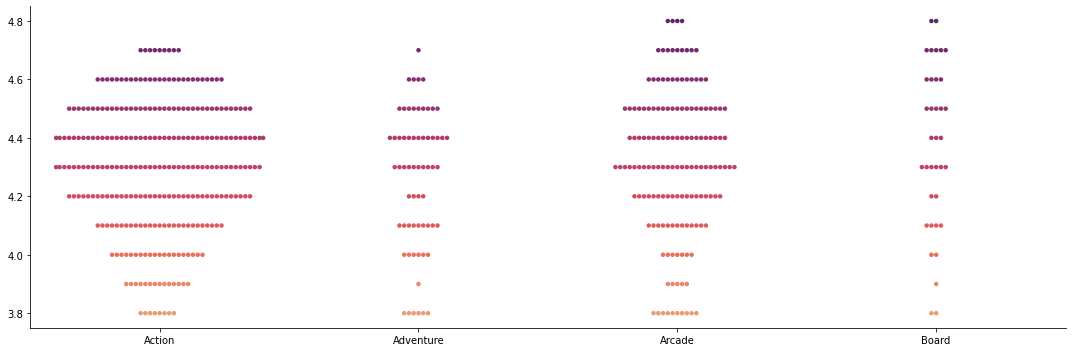

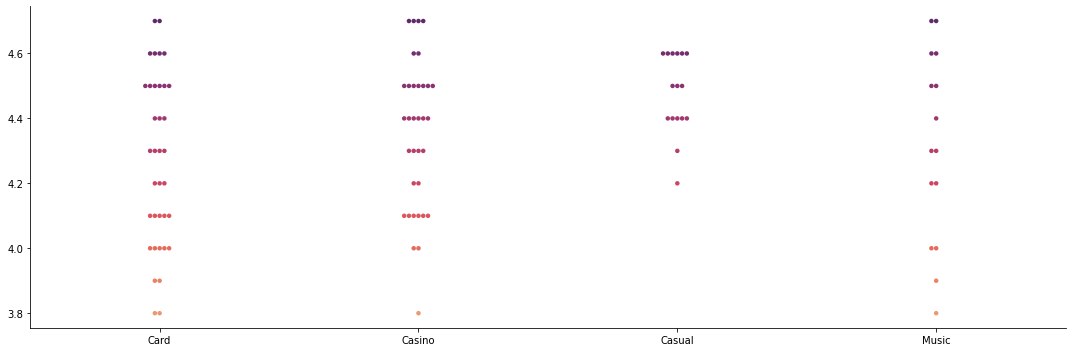

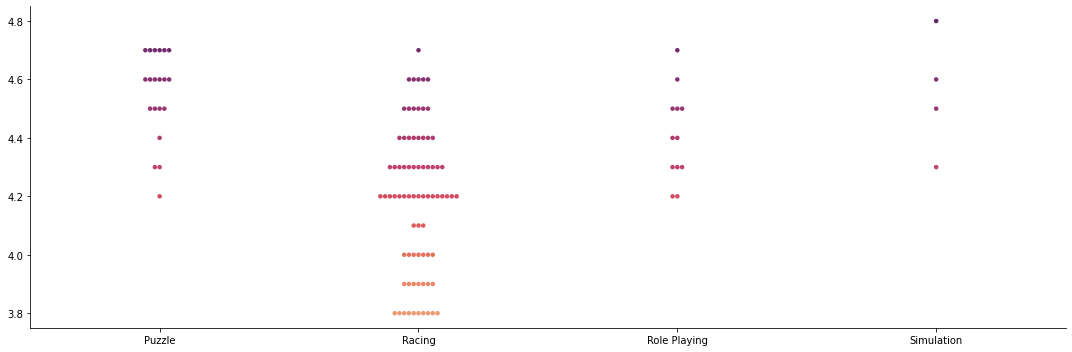

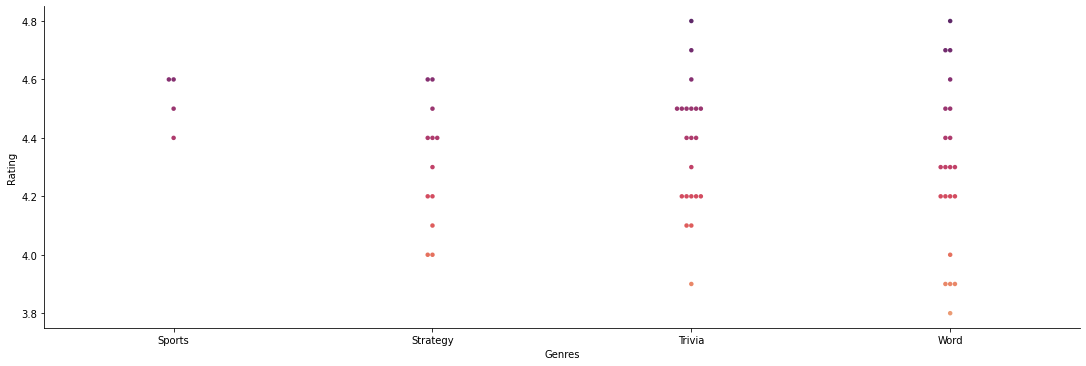

In [429]:
gam_1 = pd.concat([gam_act, gam_adv, gam_arc, gam_brd])
gam_2 = pd.concat([gam_car, gam_can, gam_cas, gam_mus])
gam_3 = pd.concat([gam_puz, gam_rac, gam_rlp, gam_sim])
gam_4 = pd.concat([gam_spr, gam_str, gam_trv, gam_wrd])


ax1 = sns.catplot(x='Genres', y='Rating', hue='Rating', palette='flare', data=gam_1, kind='swarm', aspect=3, s=4.5, legend=False)
ax2 = sns.catplot(x='Genres', y='Rating', hue='Rating', palette='flare', data=gam_2, kind='swarm', aspect=3, s=4.5, legend=False)
ax3 = sns.catplot(x='Genres', y='Rating', hue='Rating', palette='flare', data=gam_3, kind='swarm', aspect=3, s=4.5, legend=False)
ax4 = sns.catplot(x='Genres', y='Rating', hue='Rating', palette='flare', data=gam_4, kind='swarm', aspect=3, s=4.5, legend=False)

ax1.set(xlabel=None, ylabel=None)
ax2.set(xlabel=None, ylabel=None)
ax3.set(xlabel=None, ylabel=None)
ax3.set(xlabel=None, ylabel=None)

In [436]:
#frequency chart

rt_unique = rt.Category.unique()

temp_dict = {}
for i in range(len(rt_unique)):
    temp_row = {rt_unique[i]:[len(rt[rt.Category == rt_unique[i]])]}
    temp_dict.update(temp_row)

df = pd.DataFrame(temp_dict)  
df = df.melt()
df.columns = ['Categories', 'Frequency']
df = df.sort_values(by='Categories', ascending=True)
df = df.reset_index(drop=True)

#df.to_csv('category_freq.csv', sep=',', index=False)

df

,Categories,Frequency
0,ART_AND_DESIGN,56
1,AUTO_AND_VEHICLES,57
2,BEAUTY,39
3,BOOKS_AND_REFERENCE,142
4,BUSINESS,182
...,...,...
28,SPORTS,220
29,TOOLS,534
30,TRAVEL_AND_LOCAL,141
31,VIDEO_PLAYERS,110


In [449]:
j = rt_fam2.Genres.unique()

for i in j:
    print(i + ': ' + str(len(rt_fam2[rt_fam2.Genres == i])))

Entertainment;Music & Video: 11
Casual;Brain Games: 12
Adventure;Action & Adventure: 5
Educational;Creativity: 4
Puzzle;Brain Games: 17
Educational;Education: 32
Card;Brain Games: 1
Education;Creativity: 4
Casual;Pretend Play: 21
Simulation;Action & Adventure: 7
Educational;Brain Games: 5
Art & Design;Pretend Play: 1
Educational;Pretend Play: 12
Education;Education: 28
Casual;Action & Adventure: 12
Entertainment;Education: 1
Entertainment;Brain Games: 5
Casual;Education: 3
Casual;Creativity: 6
Music;Music & Video: 3
Racing;Action & Adventure: 16
Arcade;Pretend Play: 1
Action;Action & Adventure: 11
Education;Pretend Play: 14
Role Playing;Action & Adventure: 4
Simulation;Pretend Play: 3
Puzzle;Creativity: 2
Sports;Action & Adventure: 4
Educational;Action & Adventure: 3
Arcade;Action & Adventure: 12
Entertainment;Action & Adventure: 3
Puzzle;Action & Adventure: 3
Education;Action & Adventure: 4
Strategy;Action & Adventure: 2
Music & Audio;Music & Video: 1
Health & Fitness;Education: 1
Adv

In [450]:
len(j)

61

In [451]:
len(rt_fam)

1354

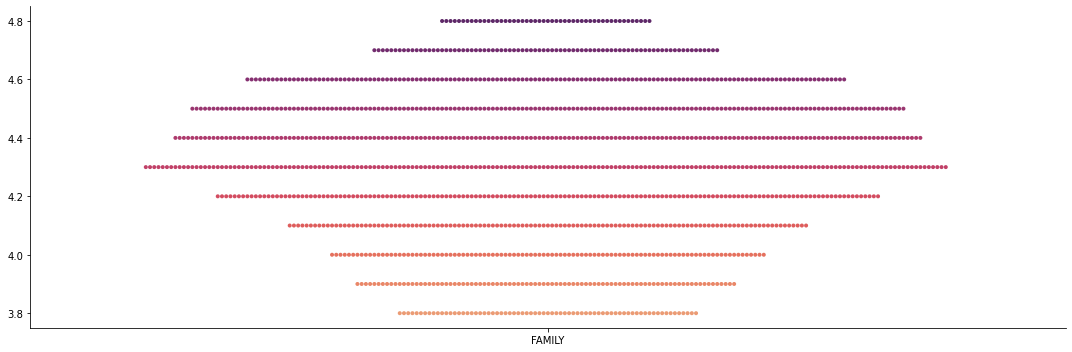

In [456]:
ax = sns.catplot(x='Category', y='Rating', hue='Rating', palette='flare', data=rt_fam, kind='swarm', aspect=3, s=4, legend=False)
ax.set(xlabel=None, ylabel=None)

In [458]:
#frequency chart

fam2_unique = rt_fam2.Genres.unique()

temp_dict = {}
for i in range(len(fam2_unique)):
    temp_row = {fam2_unique[i]:[len(rt_fam2[rt_fam2.Genres == fam2_unique[i]])]}
    temp_dict.update(temp_row)

df = pd.DataFrame(temp_dict)  
df = df.melt()
df.columns = ['Genre', 'Frequency']
df = df.sort_values(by='Genre', ascending=True)
df = df.reset_index(drop=True)

#df.to_csv('catchall_genre_freq.csv', sep=',', index=False)

df

,Genre,Frequency
0,Action;Action & Adventure,11
1,Adventure;Action & Adventure,5
2,Adventure;Brain Games,1
3,Adventure;Education,1
4,Arcade;Action & Adventure,12
...,...,...
56,Sports;Action & Adventure,4
57,Strategy;Action & Adventure,2
58,Strategy;Creativity,1
59,Strategy;Education,1
